# Лабораторная работа № 6. Построение и отбор признаков.

In [ ]:
!pip install googledrivedownloader

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from google_drive_downloader import GoogleDriveDownloader as gdd

sns.set_theme(style="ticks")

## Задание 1

Для указанных данных (diabets.csv) произведите отбор признаков и постройте модель классиффикатора используя Логистиечскую регрессию или решающее дерево.

1. Постройте простую описательную статистику.
2. Графически провизулизируйте данные (гистрограммы, парные графики, ящики с усами).
3. Постройте матрицу корреляции для признаков и перекрёстные таблицы.
4. Отберите на основе данных их пунктов 1-3 признаки, которые будут наиболее перспективными для работы эстиматора.
5. Удалите зашумленные данные по признакам. Используйте метод интерквантильного интервала и z-score.
6. Проведите нормализацию признаков используя любой метод. Проверьте гипотезы о рапределении того или иного признака в том числе графически.
7. С помощью любого метода понижения размерности графически визулизируйте данные, чтобы проверить их разделимость на классы.
8. Постройте модели эстиматоров на всех признаках и на вами отобранных. Сравните точность. Для оценки точности используйте процент угаданных ответов, матрицу несовпадений, roc_auc_score, f1-score.



https://www.kaggle.com/datasets/saurabh00007/diabetescsv

In [3]:
gdd.download_file_from_google_drive(file_id='1Wme2kMP0E9Az3WKQQWxMICaIpZe5UB88',
                                dest_path='./data/diabetes.csv')

In [5]:
df = pd.read_csv('./data/diabetes.csv')

In [ ]:
df.describe()

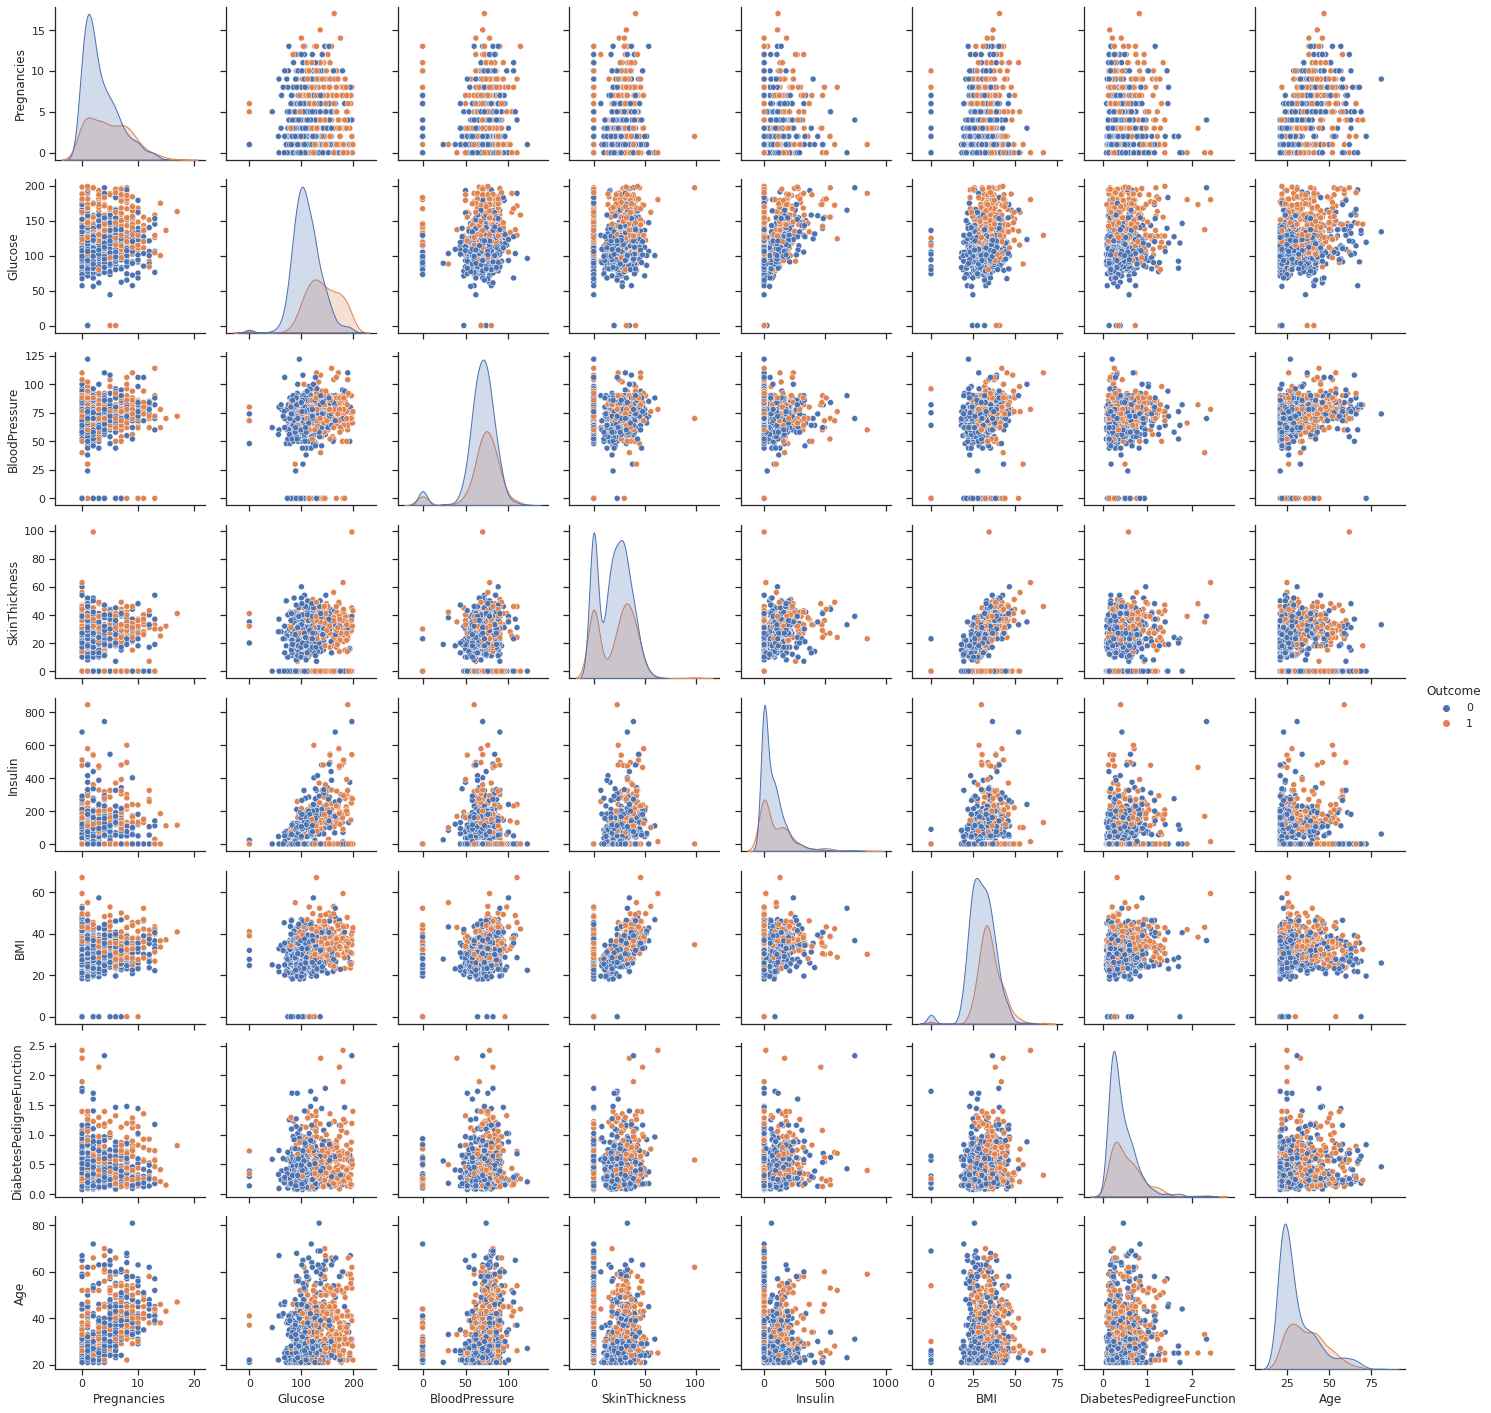

In [7]:
sns.pairplot(df, hue="Outcome")

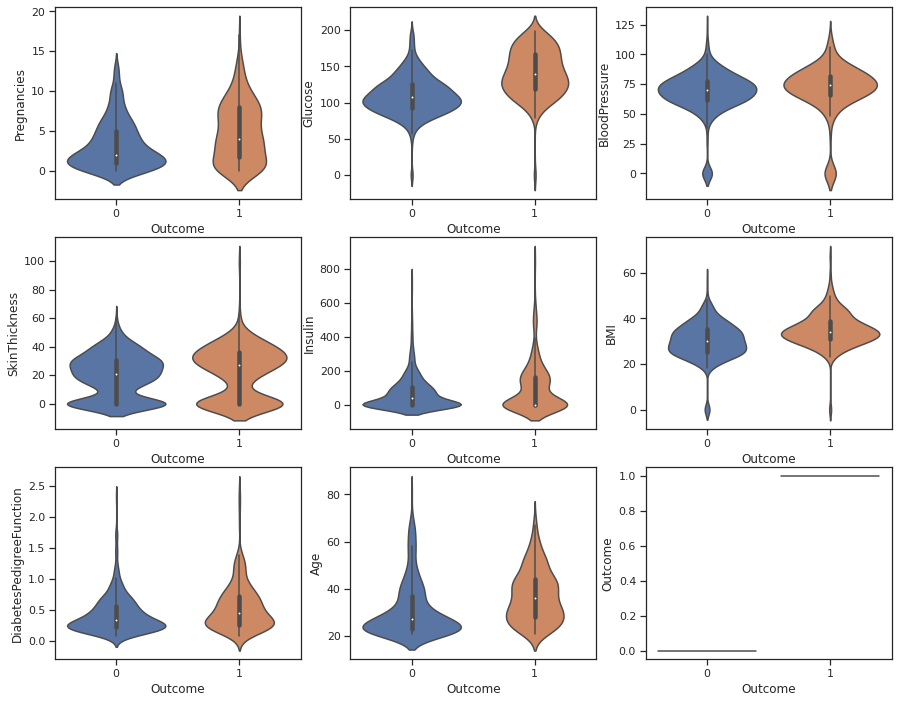

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=df.shape[1]//3, figsize=(15, 12))

for col, ax in zip(df.columns, axs.flatten()):
    sns.violinplot(data=df, y=col, x="Outcome", split=True, ax=ax)

Можно увидеть что пизнаки:
Pregnancies, Glucose, BMI	DiabetesPedigreeFunction	Age
наиболие полезные

In [9]:
df = df[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
df

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1
...,...,...,...,...,...,...
763,10,101,32.9,0.171,63,0
764,2,122,36.8,0.340,27,0
765,5,121,26.2,0.245,30,0
766,1,126,30.1,0.349,47,1


In [10]:
for col in ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction','Age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    df = df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]

In [11]:
for col in ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction','Age']:
    m = np.mean(df[col])
    s = np.std(df[col])
   
    df = df[abs((df[col] - m)/s) < 3]

In [12]:
df

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
5,5,116,25.6,0.201,30,0
...,...,...,...,...,...,...
763,10,101,32.9,0.171,63,0
764,2,122,36.8,0.340,27,0
765,5,121,26.2,0.245,30,0
766,1,126,30.1,0.349,47,1


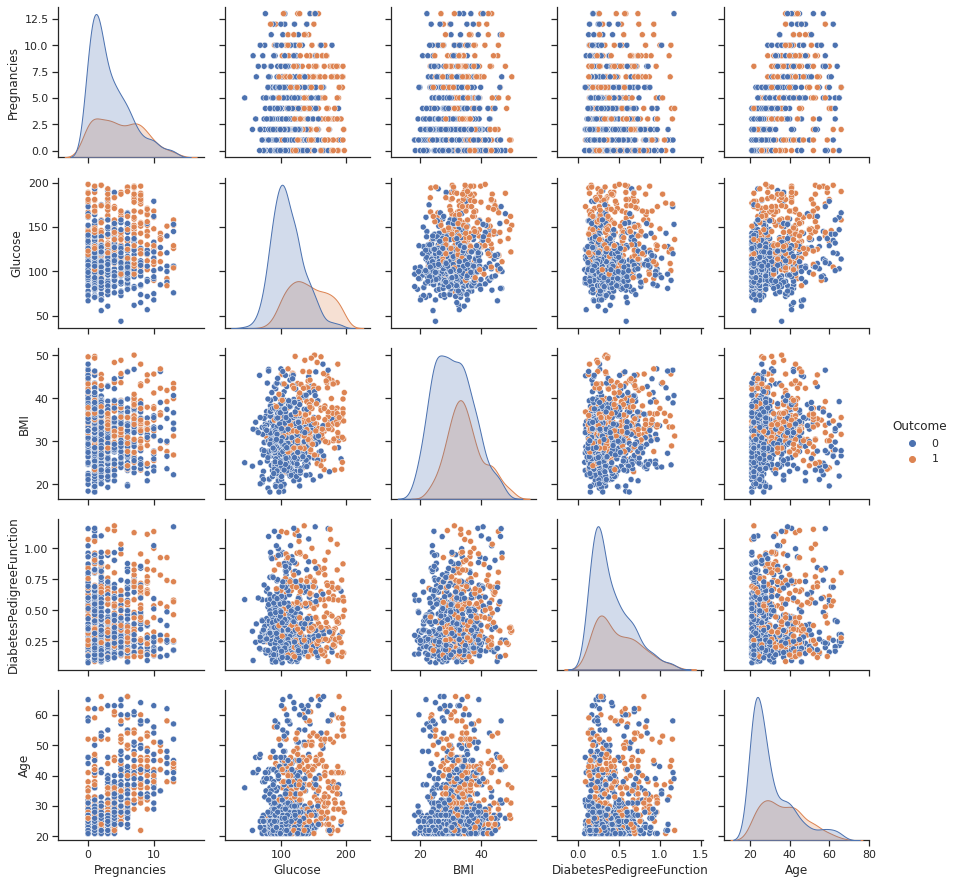

In [13]:
sns.pairplot(df, hue="Outcome")

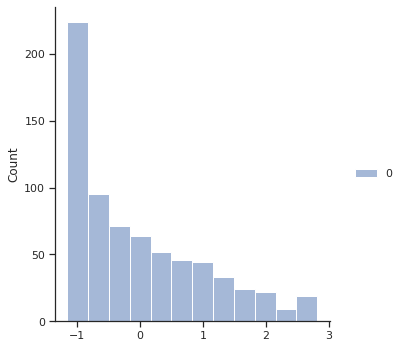

In [14]:
scaler = StandardScaler()

sns.displot(scaler.fit_transform(np.array(df['Pregnancies']).reshape(-1, 1)))

In [15]:
clf = make_pipeline(StandardScaler(), PCA(n_components=2))

In [16]:
components = clf.fit_transform(df)

In [17]:
fig = px.scatter(components, x=0, y=1, color=df['Outcome'])
fig.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(components, df['Outcome'], test_size=0.33, random_state=42)

In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
confusion_matrix(y_test, y_pred)

array([[150,  10],
       [  8,  64]])

In [22]:
accuracy_score(y_test, y_pred)

0.9224137931034483

In [23]:
f1_score(y_test, y_pred)

0.8767123287671232

In [24]:
roc_auc_score(y_test, y_pred)

0.9131944444444444

In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(df.drop('Outcome', axis=1)), df['Outcome'], test_size=0.33, random_state=42)

In [26]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.7844827586206896

In [28]:
f1_score(y_test, y_pred)

0.6376811594202899

In [29]:
roc_auc_score(y_test, y_pred)

0.7368055555555556

## Задание 2

На примере следующих данных продемонстрируйте технику заполнения пропусков и преобразования признаков. 
Постройте модель эстиматора.

https://www.kaggle.com/competitions/titanic/data

In [ ]:
gdd.download_file_from_google_drive(file_id='1bb6IC6K6O5hnb6QQ37vGnYArsbrAUEqp',
                                dest_path='./data/train.csv')

In [74]:
train_df = pd.read_csv('train.csv')

In [75]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
train_df['Age'] = train_df['Age'].fillna(value = np.mean(train_df.Age))

train_df['Cabin'] = train_df['Cabin'].fillna(value = list(train_df.Cabin.value_counts().items())[0][0])

train_df = train_df.dropna()

In [77]:
 train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1), train_df['Survived'], test_size=0.33, random_state=42)

In [80]:
reg = LogisticRegression(max_iter=1000) 

In [81]:
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
y_pred = reg.predict(X_test)

In [89]:
f1_score(y_test, y_pred)

0.7339449541284404

In [90]:
roc_auc_score(y_test, y_pred)

0.7875494071146245

## Задание 3

Используя TF-IDF векторизацию преобразуйте текстовые данные об отзывах к фильмам и постройте модель для прогноза оттенка отзыва.

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
gdd.download_file_from_google_drive(file_id='1E7jvvON-1fWOSol4SCEG8dG6AHlq_2jQ',
                            dest_path='./data/IMDB Dataset.csv')

In [125]:
df = pd.read_csv('IMDB Dataset.csv', error_bad_lines=False, engine="python")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



Skipping line 34068: unexpected end of data


In [128]:
import re
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

df['review']=df['review'].apply(lambda z: remove_punctuations(z))

df['review']=df['review'].apply(lambda z: remove_html(z))
df['review']=df['review'].apply(lambda z: remove_url(z))
df['review']=df['review'].apply(lambda z: remove_emoji(z))

In [131]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
34061,I thought I was going to watch a scary movie a...,negative
34062,The PriyadarshanParesh Rawal combo has been go...,negative
34063,this is complete crap do not watch the main ch...,negative
34064,Naturally Sadie sucks big time I have no idea ...,negative


In [138]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('sentiment', axis=1), df['sentiment'], test_size=0.33, random_state=42)

In [145]:
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
X_train = tfidf_vect.fit_transform(X_train['review'].values.tolist())
X_test = tfidf_vect.transform(X_test['review'].values.tolist())

In [150]:
X_train

<22824x4048923 sparse matrix of type '<class 'numpy.float64'>'
	with 6891404 stored elements in Compressed Sparse Row format>

In [151]:
X_test

<11242x4048923 sparse matrix of type '<class 'numpy.float64'>'
	with 1577829 stored elements in Compressed Sparse Row format>

In [147]:
lr = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)

In [152]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [154]:
y_pred = lr.predict(X_test)

In [163]:
tobin = np.vectorize(lambda x: 0 if x == 'negative' else 1)
y_pred = tobin(y_pred)
y_test = tobin(y_test)

In [164]:
f1_score(y_test, y_pred)

0.6650834174434483

## Полезные ссылки

1. [Заполнение пропусков](https://towardsdatascience.com/how-to-fill-missing-data-with-pandas-8cb875362a0d)
2. [Визульный анализ данных](https://www.kaggle.com/code/kashnitsky/topic-2-visual-data-analysis-in-python/notebook)
3. [Отбрасываем шумы](https://towardsdatascience.com/outlier-detection-part1-821d714524c)
4. [TF-IDF](https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76)